# Comparison of X-ray and tSZ derived cluster masses

In [ ]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
import cmbo

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
data_MCXC = cmbo.io.load_mcxc_catalogue(cfg['paths']['MCXC_catalogue'])
data_eRASS = cmbo.io.load_erass_catalogue(cfg['paths']['eRASS_catalogue'])
data_tSZ = cmbo.io.read_Planck_cluster_catalog(cfg['paths']['Planck_tSZ_catalogue'])

Removing 94 MCXC entries with non-positive mass uncertainties.
Removing 1805 eRASS entries with M500 = -1.


## tSZ - MCXC-II

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_73985/2318375940.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


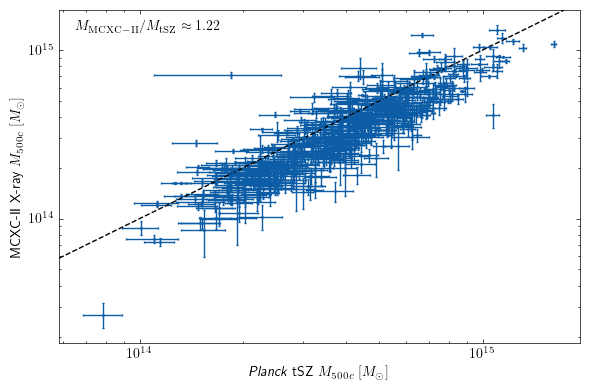

In [26]:
matches, ang_sep, dcz = cmbo.io.match_planck_to_mcxc(data_tSZ, data_MCXC, max_cz_diff_kms=500)
tSZ_matched, MCXC_matched = cmbo.io.build_matched_catalogues(data_tSZ, data_MCXC, matches)

M_tSZ = tSZ_matched["msz"] * 1e14
e_M_tSZ = 0.5 * (tSZ_matched["msz_err_up"] + tSZ_matched["msz_err_low"]) * 1e14

M_xray = MCXC_matched["M500"] * 1e14
e_M_xray = 0.5 * (MCXC_matched["ERRPM500"] + MCXC_matched["ERRMM500"]) * 1e14


r = np.median(M_tSZ / M_xray)

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(M_tSZ, M_xray, xerr=e_M_tSZ, yerr=e_M_xray,
                fmt='o', capsize=1, ms=1)

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"\textit{Planck} tSZ $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"MCXC-II X-ray $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm MCXC-II}}/M_{{\rm tSZ}} \approx {r:.2f}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_MCXC_tSZ.png", dpi=300)
    fig.show()

## tSZ - eROSITA

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_73985/2168253628.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


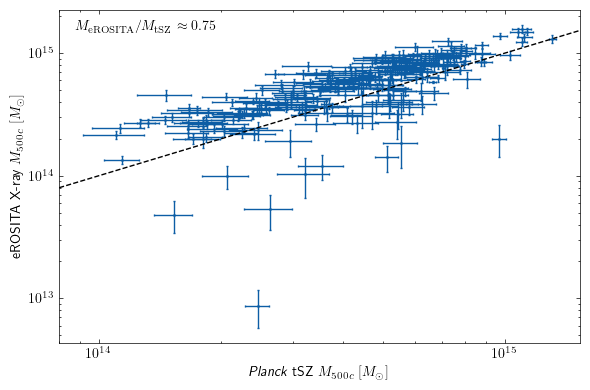

In [19]:
matches, ang_sep, dcz = cmbo.io.match_planck_to_erass(data_tSZ, data_eRASS, max_cz_diff_kms=500, max_sep_arcmin=30)
tSZ_matched, eRASS_matched = cmbo.io.build_matched_catalogues(data_tSZ, data_eRASS, matches)

M_tSZ = tSZ_matched["msz"] * 1e14
e_M_tSZ = 0.5 * (tSZ_matched["msz_err_up"] + tSZ_matched["msz_err_low"]) * 1e14

M_xray = eRASS_matched["M500"] * 1e13
e_M_xray = 0.5 * (eRASS_matched["M500_H"] - eRASS_matched["M500_L"]) * 1e13


# r, er = estimate_mass_ratio_linear(M_xray, e_M_xray, M_tSZ, e_M_tSZ, n_samples=50_000)
r = np.median(M_tSZ / M_xray)

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(M_tSZ, M_xray, xerr=e_M_tSZ, yerr=e_M_xray,
                fmt='o', capsize=1, ms=1)

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"\textit{Planck} tSZ $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"eROSITA X-ray $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm eROSITA}}/M_{{\rm tSZ}} \approx {r:.2f}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_eROSITA_tSZ.png", dpi=300)
    fig.show()

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_73985/1758107733.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


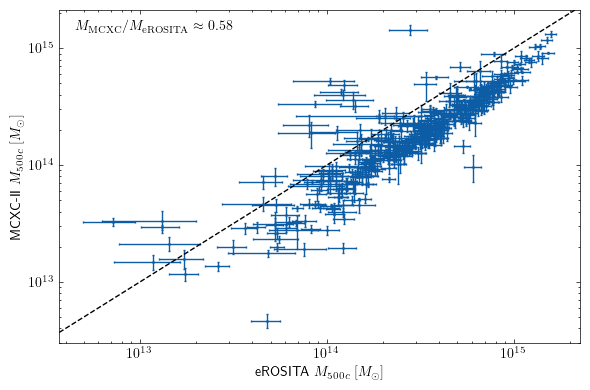

In [24]:
matches, ang_sep, dcz = cmbo.io.match_mcxc_to_erass(
    data_MCXC, data_eRASS,
    max_cz_diff_kms=500,
    max_sep_arcmin=15
)
MCXC_matched, eRASS_matched = cmbo.io.build_matched_catalogues(
    data_MCXC, data_eRASS, matches
)

M_MCXC = MCXC_matched["M500"] * 1e14
e_M_MCXC = 0.5 * (MCXC_matched["ERRPM500"] + MCXC_matched["ERRMM500"]) * 1e14

M_eRASS = eRASS_matched["M500"] * 1e13
e_M_eRASS = 0.5 * (eRASS_matched["M500_H"] - eRASS_matched["M500_L"]) * 1e13

# --- Ratio estimate ---
r = np.median(M_MCXC / M_eRASS)

# --- Plot ---
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))

    ax.errorbar(
        M_eRASS, M_MCXC,
        xerr=e_M_eRASS, yerr=e_M_MCXC,
        fmt='o', capsize=1, ms=1
    )

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"eROSITA $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"MCXC-II $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm MCXC}}/M_{{\rm eROSITA}} \approx {r:.2f}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_MCXC_eRASS.png", dpi=300)
    fig.show()